In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import tarfile
import urllib.request

In [4]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))        

In [5]:
housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
import matplotlib.pyplot as plt

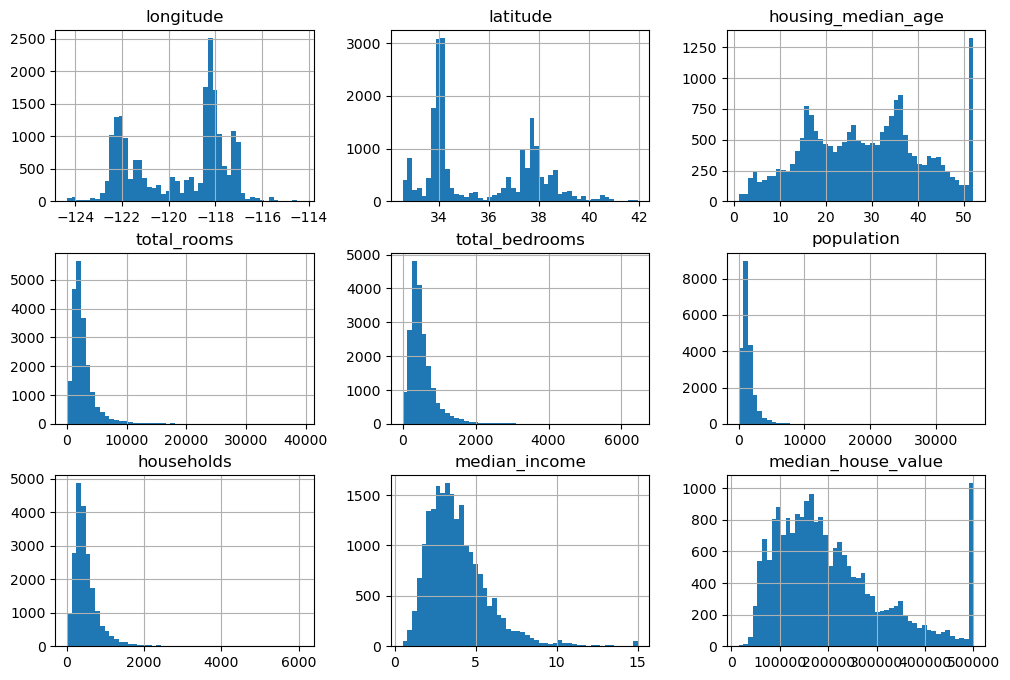

In [10]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [11]:
df = housing

In [12]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

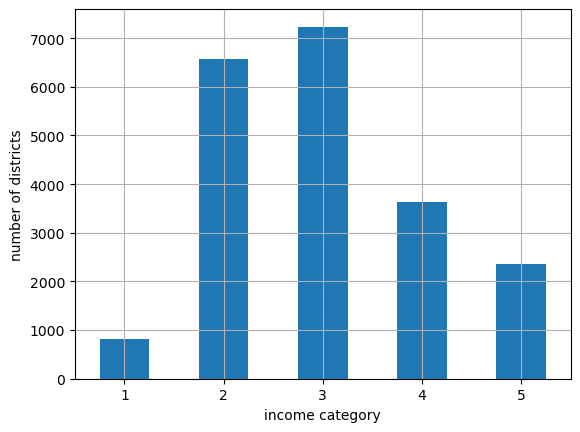

In [14]:
#create a income category as income is the important factor to predict the median house pricing
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

#plot districts vs income category
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("income category")
plt.ylabel("number of districts")
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
set_train_strat, set_test_strat = train_test_split(df, test_size=0.3, stratify=df["income_cat"], random_state=42)

In [16]:
for set_ in (set_train_strat, set_test_strat):
    set_.drop("income_cat", axis=1, inplace=True)

In [17]:
df_strat_train = set_train_strat.copy()
df_strat_test = set_test_strat.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

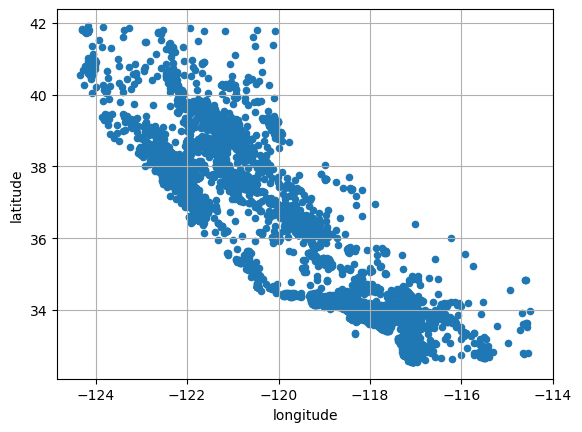

In [18]:
df_strat_train.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show

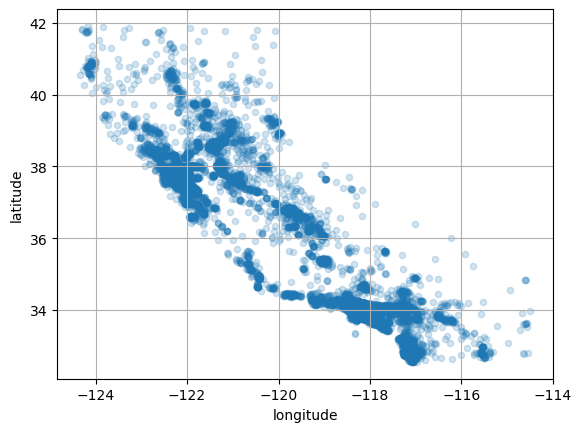

In [19]:
df_strat_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, grid=True)
plt.show()

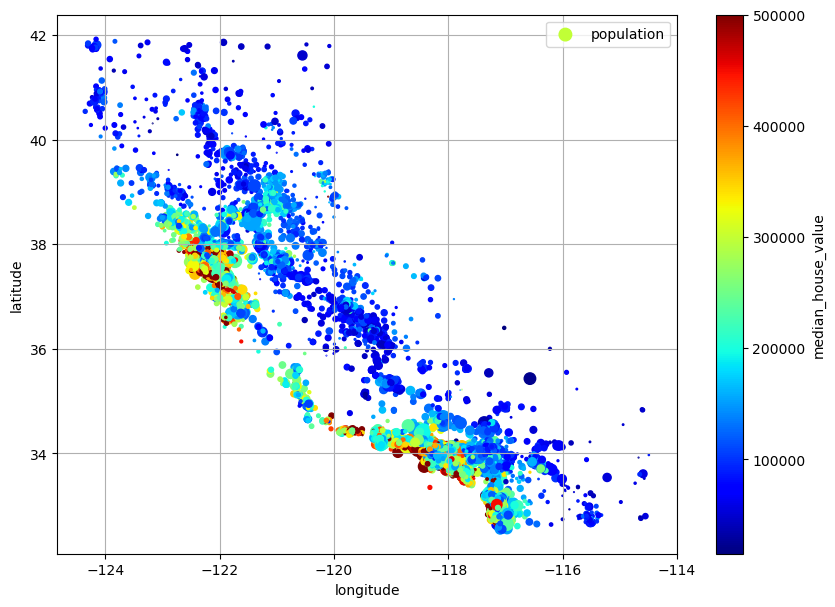

In [20]:
df_strat_train.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df_strat_train["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10,7))
plt.show()

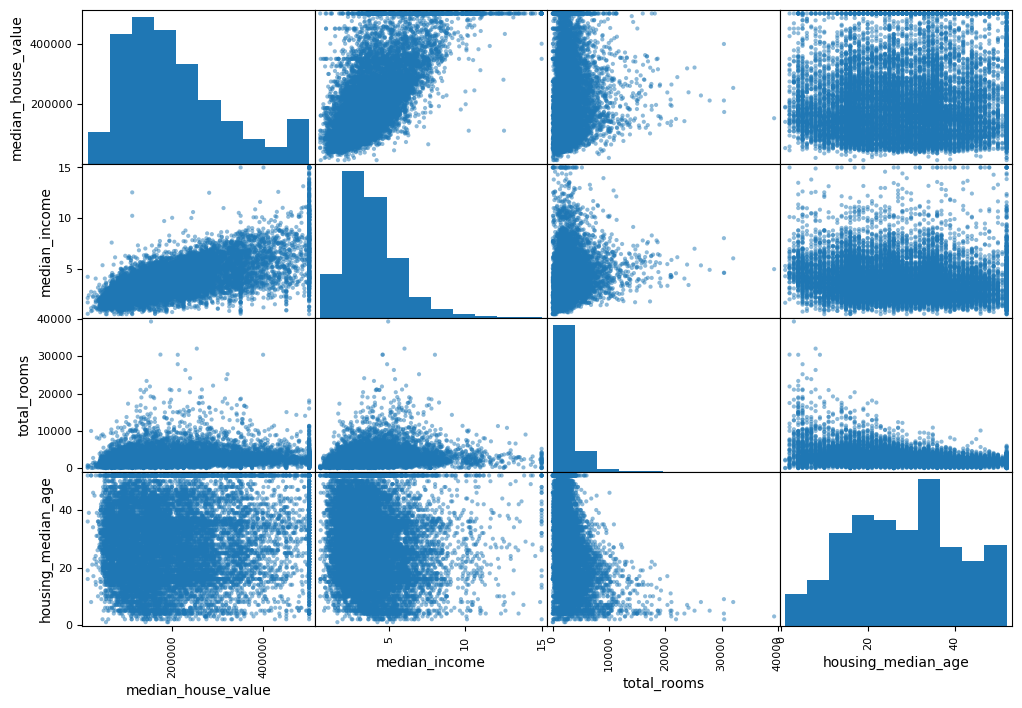

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_strat_train[attributes], figsize=(12,8))
plt.show()

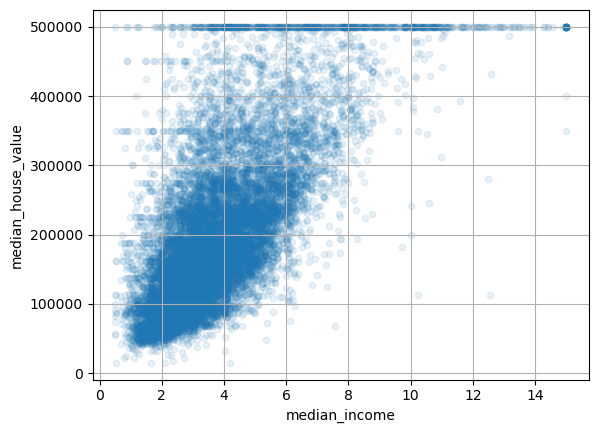

In [22]:
df_strat_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [23]:
median_train = df_strat_train["total_bedrooms"].median()
df_strat_train["total_bedrooms"].fillna(median_train, inplace=True)

In [24]:
median_test = df_strat_test["total_bedrooms"].median()
df_strat_test["total_bedrooms"].fillna(median_test, inplace=True)

In [25]:
df_strat_train["room_per_house"] = df_strat_train["total_rooms"]/df_strat_train["households"]
df_strat_train["bedrooms_ratio"] = df_strat_train["total_bedrooms"]/df_strat_train["total_rooms"]
df_strat_train["people_per_house"] = df_strat_train["population"]/df_strat_train["households"]

In [26]:
df_strat_test["room_per_house"] = df_strat_test["total_rooms"]/df_strat_test["households"]
df_strat_test["bedrooms_ratio"] = df_strat_test["total_bedrooms"]/df_strat_test["total_rooms"]
df_strat_test["people_per_house"] = df_strat_test["population"]/df_strat_test["households"]

In [27]:
df_strat_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
room_per_house        0
bedrooms_ratio        0
people_per_house      0
dtype: int64

In [28]:
df_strat_test.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
room_per_house        0
bedrooms_ratio        0
people_per_house      0
dtype: int64

In [29]:
corr_matrix =  df_strat_train.corr()

C:\Users\sumit\AppData\Local\Temp\ipykernel_6196\2312196476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =  df_strat_train.corr()


In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687394
room_per_house        0.139455
total_rooms           0.136303
housing_median_age    0.097777
households            0.071050
total_bedrooms        0.053803
population           -0.021273
longitude            -0.053189
people_per_house     -0.090992
latitude             -0.137749
bedrooms_ratio       -0.225934
Name: median_house_value, dtype: float64

In [31]:
df_cat_train = df_strat_train[["ocean_proximity"]]
df_cat_test = df_strat_test[["ocean_proximity"]]

In [32]:
df_cat_test

,ocean_proximity
17882,<1H OCEAN
17298,NEAR OCEAN
9641,<1H OCEAN
3404,<1H OCEAN
8969,<1H OCEAN
...,...
19000,INLAND
1656,NEAR BAY
7706,INLAND
15022,INLAND


In [33]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
cat_encoded_test = one_hot_encoder.fit_transform(df_cat_test)
cat_encoded_train = one_hot_encoder.fit_transform(df_cat_train)

In [34]:
cat_encoded_train.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [35]:
cat_encoded_test.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [36]:
cat_encoded_train.handle_unknown = "ignore"
cat_encoded_test.handle_unknown = "ignore"
df_new_train = pd.get_dummies(df_strat_train)
df_new_test = pd.get_dummies(df_strat_test)

In [37]:
df_new_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17882,-118.13,34.13,39.0,2099.0,397.0,1500.0,380.0,4.8304,493200.0,5.523684,0.189138,3.947368,1,0,0,0,0
17298,-122.51,37.76,40.0,2320.0,562.0,1499.0,521.0,3.2792,260800.0,4.452975,0.242241,2.877159,0,0,0,0,1
9641,-118.29,33.98,46.0,1118.0,300.0,786.0,254.0,1.4042,110000.0,4.401575,0.268336,3.094488,1,0,0,0,0
3404,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,3.847093,0.281396,1.312994,1,0,0,0,0
8969,-122.00,37.30,28.0,5096.0,1011.0,2588.0,954.0,5.3570,355200.0,5.341719,0.198391,2.712788,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19000,-119.66,37.39,10.0,2106.0,410.0,1003.0,397.0,2.7813,124100.0,5.304786,0.194682,2.526448,0,1,0,0,0
1656,-122.20,37.82,37.0,1229.0,181.0,420.0,176.0,7.0175,366700.0,6.982955,0.147274,2.386364,0,0,0,1,0
7706,-118.87,35.65,33.0,1504.0,325.0,584.0,223.0,3.4792,94600.0,6.744395,0.216090,2.618834,0,1,0,0,0
15022,-121.37,38.70,26.0,2230.0,410.0,1155.0,377.0,3.4911,88200.0,5.915119,0.183857,3.063660,0,1,0,0,0


In [38]:
df_new_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6724,-122.11,37.98,11.0,4371.0,679.0,1790.0,660.0,6.1350,297300.0,6.622727,0.155342,2.712121,0,0,0,1,0
4480,-117.10,33.17,12.0,2465.0,412.0,1226.0,428.0,5.4819,183800.0,5.759346,0.167140,2.864486,1,0,0,0,0
6108,-118.06,34.71,14.0,2606.0,514.0,1228.0,512.0,2.5764,150000.0,5.089844,0.197237,2.398438,0,1,0,0,0
16099,-122.28,38.31,52.0,58.0,18.0,48.0,22.0,1.7600,166700.0,2.636364,0.310345,2.181818,0,0,0,1,0
8664,-118.51,34.22,36.0,1493.0,285.0,766.0,272.0,4.8646,213200.0,5.488971,0.190891,2.816176,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13507,-118.09,33.90,37.0,1147.0,258.0,742.0,242.0,4.0461,153500.0,4.739669,0.224935,3.066116,1,0,0,0,0
14450,-122.22,38.11,43.0,1939.0,353.0,968.0,392.0,3.1848,112700.0,4.946429,0.182053,2.469388,0,0,0,1,0
15432,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,109500.0,5.466912,0.211163,3.533088,0,0,0,1,0
4642,-119.87,36.79,7.0,1932.0,419.0,1014.0,389.0,3.0938,76700.0,4.966581,0.216874,2.606684,0,1,0,0,0


In [39]:
X_train = df_new_train.drop("median_house_value", axis=1)
y_train = df_new_train["median_house_value"]

In [40]:
X_test = df_new_test.drop("median_house_value", axis=1)
y_test = df_new_test["median_house_value"]

C:\Users\sumit\AppData\Local\Temp\ipykernel_6196\2980948849.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X_train, y_train, 'ro', marker='.', markersize=0.5)


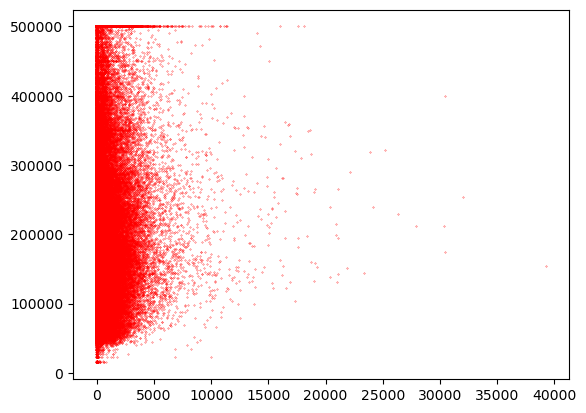

In [41]:
plt.plot(X_train, y_train, 'ro', marker='.', markersize=0.5)
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_test_scaled = std_scaler.fit_transform(X_test)

In [43]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

In [44]:
X_train_scaled

array([[-1.26891298,  1.09818725, -1.39243406, ..., -0.01176633,
         2.82085494, -0.38178179],
       [ 1.23485581, -1.1556484 , -1.31308452, ..., -0.01176633,
        -0.35450246, -0.38178179],
       [ 0.75509173, -0.43404613, -1.15438542, ..., -0.01176633,
        -0.35450246, -0.38178179],
       ...,
       [-1.32388595,  1.0091584 ,  1.22610098, ..., -0.01176633,
         2.82085494, -0.38178179],
       [-0.14946346,  0.5405855 , -1.70983225, ..., -0.01176633,
        -0.35450246, -0.38178179],
       [-1.28390561,  0.95761538,  0.51195506, ..., -0.01176633,
         2.82085494, -0.38178179]])

In [45]:
X_test_scaled

array([[ 0.71510148, -0.69695885,  0.80903826, ..., -0.02201661,
        -0.35036569, -0.39069596],
       [-1.46476125,  0.9993282 ,  0.88876778, ..., -0.02201661,
        -0.35036569,  2.55953502],
       [ 0.63547179, -0.76705336,  1.36714487, ..., -0.02201661,
        -0.35036569, -0.39069596],
       ...,
       [ 0.34681417,  0.01333214,  0.33066117, ..., -0.02201661,
        -0.35036569, -0.39069596],
       [-0.89739971,  1.4385871 , -0.22744544, ..., -0.02201661,
        -0.35036569, -0.39069596],
       [ 0.61058752, -0.74368852,  1.44687439, ..., -0.02201661,
        -0.35036569, -0.39069596]])

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_lin = lin_reg.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error
rmse_lin = mean_squared_error(y_test, y_pred_lin, squared=False)

In [49]:
rmse_lin

69911.59974813875

In [50]:
#try tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
y_pred_tree = tree_reg.predict(X_test)

In [52]:
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

In [53]:
rmse_tree

70803.94553305148

In [54]:
#cross validation
from sklearn.model_selection import cross_val_score
rmse_lin_cv = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

In [55]:
rmse_lin_cv

array([67835.04705472, 68160.43291195, 66996.42113154, 69330.55796633,
       68436.43440316, 67171.09518852, 67737.42416122, 71419.57408308,
       69272.26391945, 66852.90937316])

In [56]:
rmse_tree_cv = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

In [57]:
rmse_tree_cv

array([68380.62256861, 68084.84402612, 71212.11524226, 69874.16858719,
       69546.16253811, 72484.59429144, 69716.26975108, 70656.64025961,
       69372.70886964, 68731.28104297])

In [58]:
pd.Series(rmse_tree_cv).describe()

count       10.000000
mean     69805.940718
std       1345.472697
min      68084.844026
25%      68891.638000
50%      69631.216145
75%      70461.022342
max      72484.594291
dtype: float64

In [59]:
pd.Series(rmse_lin_cv).describe()

count       10.000000
mean     68321.216019
std       1389.371140
min      66852.909373
25%      67312.677432
50%      67997.739983
75%      69063.306540
max      71419.574083
dtype: float64

In [60]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred_forest = forest_reg.predict(X_test)

In [62]:
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)

In [63]:
rmse_forest

50471.391064799085

In [64]:
rmse_forest_cv = -cross_val_score(forest_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)

In [65]:
rmse_forest_cv

array([50972.68117823, 50604.83413032, 52734.17246965])

In [66]:
pd.Series(rmse_forest_cv).describe()

count        3.000000
mean     51437.229259
std       1138.145039
min      50604.834130
25%      50788.757654
50%      50972.681178
75%      51853.426824
max      52734.172470
dtype: float64

In [67]:
parameters=[
    {'max_features':[4,6,8]},
    {'max_features':[6,8,10]},
]

In [68]:
#Lets fine tune our model
from sklearn.model_selection import GridSearchCV
forest_grid = GridSearchCV(estimator=forest_reg, param_grid = parameters, cv = 2, scoring="neg_root_mean_squared_error")

In [69]:
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [4, 6, 8]},
                         {'max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [70]:
forest_grid.best_params_
forest_grid.best_estimator_

RandomForestRegressor(max_features=6, random_state=42)

In [71]:
forest_grid.cv_results_

{'mean_fit_time': array([ 5.27186167,  7.19151354,  9.24011505,  7.17663026,  9.5686667 ,
        11.42482972]),
 'std_fit_time': array([0.03233159, 0.051018  , 0.06614316, 0.05417371, 0.04764676,
        0.24281192]),
 'mean_score_time': array([0.24689984, 0.2521584 , 0.24523866, 0.24903786, 0.25284672,
        0.2469629 ]),
 'std_score_time': array([0.00398207, 0.00093055, 0.00225461, 0.00429189, 0.00163269,
        0.00365674]),
 'param_max_features': masked_array(data=[4, 6, 8, 6, 8, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 4},
  {'max_features': 6},
  {'max_features': 8},
  {'max_features': 6},
  {'max_features': 8},
  {'max_features': 10}],
 'split0_test_score': array([-50744.58863755, -50689.70843306, -51076.86516226, -50689.70843306,
        -51076.86516226, -51186.27739571]),
 'split1_test_score': array([-52067.20451667, -51586.35560238, -51976.51131226, -51586.35560238,

In [72]:
from scipy.stats import randint
param_dist = [
    {"max_features": randint(low=2, high=20)}
]

In [73]:
from sklearn.model_selection import RandomizedSearchCV
forest_rand_search = RandomizedSearchCV(estimator=forest_reg, n_iter =5, param_distributions = param_dist, cv = 2, scoring="neg_root_mean_squared_error")

In [74]:
forest_rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions=[{'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022BF6DA23B0>}],
                   scoring='neg_root_mean_squared_error')

In [75]:
best_param = forest_rand_search.best_params_
best_model = forest_rand_search.best_estimator_

In [76]:
forest_rand_search.cv_results_

{'mean_fit_time': array([12.52566803, 15.20733893,  4.26416719, 10.12182033, 15.12037146]),
 'std_fit_time': array([0.47743785, 0.15390193, 0.00540149, 0.02422702, 0.09145153]),
 'mean_score_time': array([0.24944961, 0.2532481 , 0.24400628, 0.24310148, 0.25294352]),
 'std_score_time': array([4.09090519e-03, 6.35385513e-05, 7.97867775e-04, 1.11460686e-04,
        3.52859497e-05]),
 'param_max_features': masked_array(data=[11, 14, 3, 9, 14],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 11},
  {'max_features': 14},
  {'max_features': 3},
  {'max_features': 9},
  {'max_features': 14}],
 'split0_test_score': array([-51412.30443798, -51941.90670266, -51418.48804401, -50822.93594962,
        -51941.90670266]),
 'split1_test_score': array([-52332.90290494, -52793.27439426, -52486.90162116, -52120.91825597,
        -52793.27439426]),
 'mean_test_score': array([-51872.60367146, -52367.59054846, -51952.694

In [77]:
feature_importances = best_model.feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.04, 0.01, 0.01, 0.01, 0.01, 0.39, 0.04, 0.05, 0.12,
       0.01, 0.16, 0.  , 0.  , 0.  ])

In [78]:
attributes = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value", "room_per_house", "bedrooms_ratio", "people_per_house", "ocean_proximity_<1H OCEAN", "ocean_proximity_INLAND", "ocean_proximity_ISLAND", "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"]

In [79]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.390793398263327, 'median_income'),
 (0.15894467484958058, 'ocean_proximity_<1H OCEAN'),
 (0.11529399029920225, 'bedrooms_ratio'),
 (0.06751046506816355, 'longitude'),
 (0.05967542321805675, 'latitude'),
 (0.052893431262944796, 'room_per_house'),
 (0.04481802533688597, 'median_house_value'),
 (0.042671044725828056, 'housing_median_age'),
 (0.01492662383503602, 'total_rooms'),
 (0.014488888603685014, 'population'),
 (0.014080623864867527, 'total_bedrooms'),
 (0.013659370873179033, 'households'),
 (0.005414517430758919, 'people_per_house'),
 (0.003025593040164834, 'ocean_proximity_NEAR BAY'),
 (0.001659071768676857, 'ocean_proximity_ISLAND'),
 (0.00014485755964302197, 'ocean_proximity_INLAND')]

In [80]:
from scipy import stats
confidence = 0.95
squared_errors = (y_pred_forest - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([48545.55631956, 52326.39480851])